## ИГРА КРЕВЕТОК С РЫБАМИ

### Предисловие

Океан представляется двумерным массивом ячеек. 

Каждая явейка может быть:
* пустой
* со скалой
* с рыбой
* с креветкой


Ячейки являются соседними, если имеют хотя бы по одной общей точке с данной ячейкой.
Все ячейки за границами игрового поля считаются пустыми. 

Правила обновления ячеек:
* ячейки со скалами не меняются во времени
* если какой-то рыбе слишком тесно (от 4 и более соседей-рыб), то рыба погибает
* если рыбе слишком одиноко (0 или 1 соседей-рыб), то рыба погибает
* если у рыбы 2 или 3 соседа-рыбы, то она просто продолжает жить
* соседи-скалы и соседи-креветки никак не влияют на жизнь рыб
* креветки существуют по аналогичным правилам (учитывая только соседей креветок)
* если какая-то ячейка океана была пуста и имела ровно 3-х соседей рыб, то в следующий момент времени в ней рождается рыба.
Иначе если у ячейки было ровно три соседа-креветки, в ней рождается креветка
* изменение всех ячеек океана происходит одновременно, учитывая только состояния ячеек в предыдущий момент времени

В каждый квант времени ячейки последовательно обрабатываются.

### Условие

Вам нужно в файле ```life_game.py``` реализовать класс ```LifeGame```.
* Инициализируется начальным состоянием океана - прямоугольным списком списков (формируя тем самым матрицу), каждый элемент которого это число. 
0 - если ячейка пустая, 1 - со скалой, 2 - с рыбой, 3 - с креветкой
* Содержит метод ```get_next_generation```, который обновляет состояние океана и возвращает его содержимое
* ```get_next_generation``` должен быть единственный публичным методом в классе
* Вам нужно подумать, как поделить все на небольшие логические методы, которые, 
в отличие от ```get_next_generation``` пометить "приватными", то есть через underscore. 

Например, вы хотите создать метод, который извлекает соседей для клетки
```python
class LifeGame(object):
    ...
    def _get_neighbours(self, i: int, j: int):
        pass
```
Это не настоящее сокрытие реализации. Это способ оповестить пользователя о том, что у него нет никаких гарантий на этот метод.

## Пример

```python
>>> life_game = LifeGame([[1, 1], [1, 1]])
>>> life_game.get_next_generation()
[[1, 1], [1, 1]]
```


In [0]:
import copy

class LifeGame(object):
    """
    Class for Game life

    board=[
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 2, 0, 0, 0, 0],
        [0, 0, 0, 2, 2, 2, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]
    ],
    expected=[
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 2, 2, 2, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 0, 0, 2, 0],
        [0, 2, 0, 0, 0, 0, 0, 2, 0],
        [0, 2, 0, 0, 0, 0, 0, 2, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 2, 2, 2, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]
    ],
    generation_number=9
    """
    EMPTY = 0
    ROCK = 1
    FISH = 2
    SHRIMP = 3

    def __init__(self, board):
      self.board = copy.deepcopy(board)
      self._max_y = len(board)
      self._max_x = len(board[0])

    def get_next_generation(self):
      self.board = self._update_board()
      return self.board

    def _is_valid(self, y, x):
      return (0 <= y < self._max_y) and (0 <= x < self._max_x)

    def _get_neighbours(self, y, x):
      neighbours = []
      for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
          if self._is_valid(y + i, x + j) and not (i == j == 0):
            neighbours.append(self.board[y + i][x + j])
      # neighbours.pop(neighbours.index(self._board[y][x]))
      return neighbours

    def _update_board(self):
      new_board = copy.deepcopy(self.board)
      for y in range(self._max_y):
        for x in range(self._max_x):
          new_board[y][x] = self._update_cell(y, x)
      return new_board

    def _update_cell(self, y, x):
      neighbours = self._get_neighbours(y, x)
      cell = self.board[y][x]

      if cell == self.EMPTY:
        return self._empty_rule(neighbours)
      elif cell == self.ROCK:
        return self._rock_rule(neighbours)
      elif cell == self.FISH:
        return self._fish_rule(neighbours)
      elif cell == self.SHRIMP:
        return self._shrimp_rule(neighbours)
      else:
        raise Exception("Unknown cell type")

    def _empty_rule(self, neighbours):
      if neighbours.count(self.FISH) == 3:
        return self.FISH
      elif neighbours.count(self.SHRIMP) == 3:
        return self.SHRIMP
      return self.EMPTY

    def _rock_rule(self, neighbours):
      return self.ROCK

    def _fish_rule(self, neighbours):
      if 2 <= neighbours.count(self.FISH) <= 3:
        return self.FISH
      return self.EMPTY

    def _shrimp_rule(self, neighbours):
      if 2 <= neighbours.count(self.SHRIMP) <= 3:
        return self.SHRIMP
      return self.EMPTY


# Test

In [34]:
board=[
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 2, 0, 0, 0, 0],
        [0, 0, 0, 2, 2, 2, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]
    ]
expected=[
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 2, 2, 2, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 0, 0, 2, 0],
        [0, 2, 0, 0, 0, 0, 0, 2, 0],
        [0, 2, 0, 0, 0, 0, 0, 2, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 2, 2, 2, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]
    ]
generation_number=9
game = LifeGame(board)

for i in range(9):
    result = game.get_next_generation()
result == expected



True

# Glider

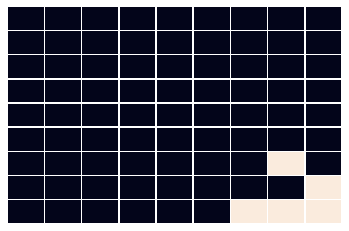

In [35]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import seaborn as sns; sns.set()

board=[
        [0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0, 0, 0, 0],
        [2, 2, 2, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]
    ]

game = LifeGame(board)

for x in range(25):
  clear_output(wait=True)
  ax = sns.heatmap(board, linewidth=0.5, cbar=False, 
                   yticklabels=False, xticklabels=False)
  board = game.get_next_generation()

  plt.show() 
  time.sleep(0.2)